In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
File=[]
for dirname, _, filenames in os.walk("//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset"):
    for filename in filenames:
        File+=[os.path.join(dirname, filename)]
        
File2=[]
for file in File:
    if file[-5:]=='.jpeg':
        File2+=[file]  

print(File[:10])
print(File2[:10])

['//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly/OIP-uBrP5dQ-QdWtdphWQUDw0gHaHa.jpeg', '//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly/OIP-x3ds-GLfBdrjkAMkSfQSDwHaE9.jpeg', '//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly/OIP-XlrZTvHwH0G9thYYYHPA9gHaFJ.jpeg', '//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly/OIP-m_QLFvdrUg6OlAtigj7vCgHaE7.jpeg', '//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly/OIP-p42jbZosQ-lsEbCR5YncIAHaEo.jpeg', '//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly/OIP-_mIa90VLaHMZjCJqfJKpTgHaE7.jpeg', '//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly/OIP-poWbJLwAJ2I0PscHcMUAsAHaHa.jpeg', '//content/drive/MyDrive/C

In [ ]:
Name0=[]
for dirname, _, filenames in os.walk("//content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset"):
    Name0+=[dirname]

Name1=[]
for item in Name0:
    Name1+=[item[27:]]

Name2=[]
for item in Name1:
    if (item!=''):
        Name2+=[item]
                
Name3=sorted(Name2)
Name3 = Name3[1:]
print(Name3) 

['ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/cat', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/chicken', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/cow', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/dog', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/elephant', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/horse', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/sheep', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/spider', 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/squirrel']


In [ ]:
dir0="/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly"
dir1='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/cat'
dir2='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/chicken'
dir3='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/cow'
dir4='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/dog'
dir5='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/elephant'
dir6='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/horse'
dir7='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/sheep'
dir8='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/spider'
dir9='/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/squirrel'

In [ ]:
Dirs=[ dir0,dir1,dir2,dir3,dir4,dir5,dir6,dir7,dir8,dir9 ]
mapping={ Name3[0]:0,Name3[1]:1,Name3[2]:2,Name3[3]:3,Name3[4]:4,Name3[5]:5,Name3[6]:6,Name3[7]:7,Name3[8]:8,Name3[9]:9 }

mapping

{'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/butterfly': 0,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/cat': 1,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/chicken': 2,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/cow': 3,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/dog': 4,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/elephant': 5,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/horse': 6,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/sheep': 7,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/spider': 8,
 'ab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/squirrel': 9}

In [ ]:
dataset=[]
testset=[]
count=0
for dirs in Dirs:
    i=0
    for file in File2:
        if dirs in file:
            image=load_img(file, grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if i<1000:
                dataset.append([image,count])
                i+=1
            else:
                testset.append([image,count])
    count=count+1

In [ ]:
data0,labels0=zip(*dataset)
test0,labelsTest0=zip(*testset)

In [ ]:
labels1=to_categorical(labels0)
labels=np.array(labels1)
data=np.array(data0)
print("Data Shape:{}\nDataLabels shape: {}".format(data.shape,labels.shape))

Data Shape:(10000, 100, 100, 3)
DataLabels shape: (10000, 10)


In [ ]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(8000, 100, 100, 3)
(2000, 100, 100, 3)
(8000, 10)
(2000, 10)


In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                            width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=(100,100,3),
                                                     include_top=False,
                                                     weights='imagenet',
                                                     pooling='avg')
pretrained_model.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)

outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),
              validation_data=(testx,testy),
              epochs=30)

Epoch 1/30
250/250 [==============================] - 57s 90ms/step - loss: 1.5968 - accuracy: 0.4813 - val_loss: 0.6941 - val_accuracy: 0.7665
Epoch 2/30
250/250 [==============================] - 21s 86ms/step - loss: 0.9956 - accuracy: 0.6558 - val_loss: 0.6871 - val_accuracy: 0.7735
Epoch 3/30
250/250 [==============================] - 21s 84ms/step - loss: 0.9057 - accuracy: 0.6903 - val_loss: 0.7247 - val_accuracy: 0.7625
Epoch 4/30
250/250 [==============================] - 21s 84ms/step - loss: 0.8612 - accuracy: 0.7086 - val_loss: 0.6441 - val_accuracy: 0.7805
Epoch 5/30
250/250 [==============================] - 21s 83ms/step - loss: 0.8476 - accuracy: 0.7102 - val_loss: 0.6304 - val_accuracy: 0.7910
Epoch 6/30
250/250 [==============================] - 21s 84ms/step - loss: 0.8158 - accuracy: 0.7187 - val_loss: 0.5949 - val_accuracy: 0.8000
Epoch 7/30
250/250 [==============================] - 21s 83ms/step - loss: 0.8218 - accuracy: 0.7118 - val_loss: 0.6458 - val_accuracy:

In [ ]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)

print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       188
           1       0.87      0.75      0.81       200
           2       0.82      0.92      0.86       207
           3       0.54      0.87      0.67       174
           4       0.84      0.70      0.77       210
           5       0.87      0.85      0.86       202
           6       0.78      0.71      0.74       220
           7       0.82      0.77      0.80       221
           8       0.93      0.77      0.84       180
           9       0.84      0.77      0.81       198

    accuracy                           0.80      2000
   macro avg       0.82      0.81      0.80      2000
weighted avg       0.82      0.80      0.81      2000



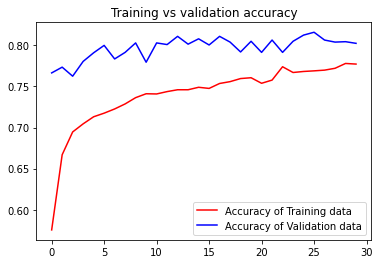

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

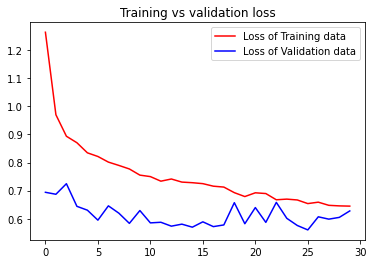

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

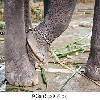

In [ ]:
load_img("/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/elephant/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(100,100))

In [ ]:
image=load_img("/content/drive/MyDrive/Colab Notebooks/Animal Popularity on Instagram/Animals_10_Dataset/elephant/OIP---LeldVL441fx5S66TGgVQAAAA.jpeg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [ ]:
reverse_mapping={ 0:Name3[0],1:Name3[1],2:Name3[2],3:Name3[3],4:Name3[4],5:Name3[5],6:Name3[6],7:Name3[7],8:Name3[8],9:Name3[9] }

def mapper(value):
    return reverse_mapping[value]

def category(name):
  x = len(name) - 1
  for i in range(0,len(name)):
    if name[x] == '/':
      return name[x+1:]
    else:
      x = x-1

  
pred=model.predict(prediction_image)
value=np.argmax(pred)


name0=mapper(value)
name_actual = category(name0)
print("Prediction is {}.".format(name_actual))

Prediction is elephant.


In [ ]:
test=np.array(test0)
pred2=model.predict(test)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
    
print(pred2.shape)

(14209, 10)


In [ ]:
ANS=list(labelsTest0)

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.7664860299809979


In [ ]:
final = pd.DataFrame(columns = ['Image', 'Prediction'])

final['Image'] = labelsTest0
final['Prediction'] = PRED

print(final.count())
print("\n\n",final[final['Image']!=final['Prediction']].count())

Image         14209
Prediction    14209
dtype: int64


 Image         3318
Prediction    3318
dtype: int64
